Import Data and Ploting Table

In [10]:
#load packages 
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

In [11]:
# parse datetime
def parser(x):
	return datetime.strptime('201'+x, '%Y-%m')

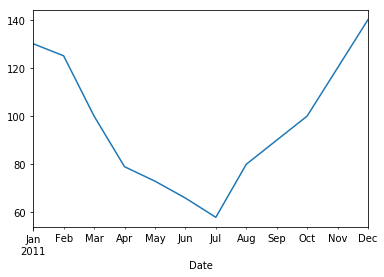

In [12]:
#plot of dataset
series = read_csv('dataset.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.plot()
pyplot.show()

Persistence Algorithm

In [15]:
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error

Step 1: Define the Supervised Learning Problem

In [16]:
#create lagged dataset - observation from t-1 to prediction t+1
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

     t-1  t+1
0    NaN  130
1  130.0  125
2  125.0  100
3  100.0   79
4   79.0   73


Step 2: Train and Test Sets

In [17]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

Step 3: Persistence Algorithm

In [18]:
# persistence model
def model_persistence(x):
	return x

Step 4: Make and Evaluate Forecast

In [19]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 296.800


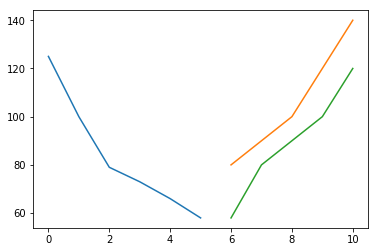

In [20]:
#plot the predictions
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()